Gradiente Descendente Estocástico para Clasificación --- 11:53 min
====

* 11:53 min | Última modificación: Octubre 13, 2021 | [YouTube](https://youtu.be/Fl_uasckNsM)

Definición
---

En este caso, se asume que el dataset esta formado por los ejemplos $(x_1, y_1), \cdots, (x_n, y_n)$, donde cada $x_i$ es un vector $m$ dimensional y $y \in \{-1, +1 \}$.

En un modelo de regresión, la variable dependiente $y$ es una función lineal de las variables independientes $x_i$, tal que:


$$f(x)= b + w^T x$$


Donde: 


* $x$ es un patrón o ejemplo del dataset.


* $b$ es el intercepto del modelo.


* $w$ son los coeficientes de las variales independientes.


Para determinar la clase, se aplica la función $\text{sign}(u)$

Función de pérdida
---

* `hinge`: 

$$
L\left(y, f(x_i) \right) = 
\max (0, 1 -  y_i f(x_i)
$$ 

* `perceptron`: 

$$
L\left(y, f(x_i) \right) = 
\max (0, -y_i f(x_i))
$$ 

* `modified_huber`: 

$$L\left(y, f(x_i) \right) = 
\begin{cases}
\max(0, 1 - y_i f(x_i))^2 & \text{Si } y_i f(x_i) \gt 1 \\
\\
-4 y_i f(x_i) & \text{en cualquier otro caso}
\end{cases}
$$ 

* `log`: logistica

$$
L\left(y, f(x_i) \right) = 
\log \left(1 + \exp(- y f(x_i)) \right)
$$

* Least-squares:

$$
L\left(y, f(x_i) \right) = 
\frac{1}{2} [y_i - f(x_i)]^2
$$

* `huber`: 
  $$
  L(d, y)=
    \begin{cases}
        \frac{1}{2}[d - y]^2 & \text{Si } |d-y| \le \epsilon \\
        \\
        \epsilon |d-y|-\frac{1}{2}\epsilon^2 & \text{en cualquier otro caso}
        \end{cases}
  $$ 

* `squared hinge`: 

$$
L\left(y, f(x_i) \right) = 
[\max (0, 1 -  y_i f(x_i)]^2
$$ 

* Cualquiera de las funciones usadas con `SGDRegressor`.
  

Regularización
---

$R$ es el término de regularización, el cual puede ser especificado como:

* L2:

$$
R(w) = \frac{1}{2} \sum_j w_j^2
$$

* L1:

$$
R(w) = \frac{1}{2} \sum_j |w_j|
$$

* Elastic Net:

$$
R(w) = \frac{\rho}{2}  \sum_j w_j^2 + (1 - \rho)  \sum_j |w_j|
$$



Algoritmo de entrenamiento
---

La estimación de parámetros se realiza utilizando el algoritmo de gradiente descendente estocástico, actualizando los parámetros del modelo a medida que va recorriendo los ejemplos (patrón de entrenamiento).

$$
w \leftarrow w - \eta 
\left[
\alpha \frac{\partial R(w)}{\partial w} +
\frac{\partial L(w^Tx_i + b_i, y_i}{\partial w}
\right]
$$

Ejemplo numérico
---

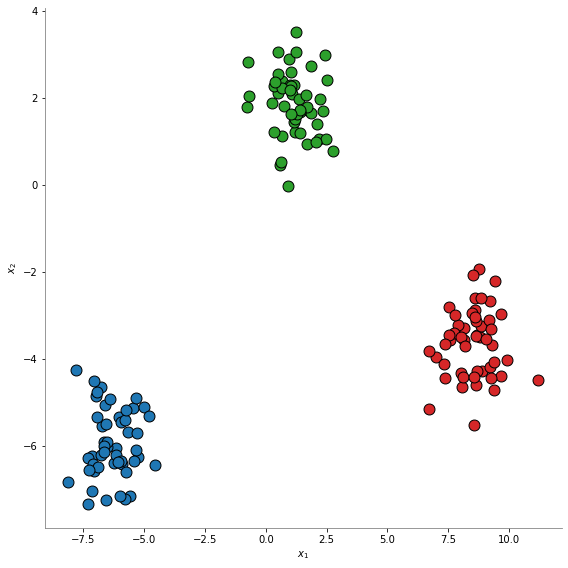

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

NPOINTS = 150

X, y = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)


def plot_scatter():
    plt.scatter(X[:50, 0], X[:50, 1], color="tab:red", edgecolors="k", s=120)
    plt.scatter(X[50:100, 0], X[50:100, 1], color="tab:blue", edgecolors="k", s=120)
    plt.scatter(X[100:, 0], X[100:, 1], color="tab:green", edgecolors="k", s=120)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.tight_layout()


plt.figure(figsize=(8, 8))
plot_scatter()
plt.show()

In [2]:
from sklearn.linear_model import SGDClassifier

sgdClassifier = SGDClassifier()
sgdClassifier.fit(X, y)


display(
    sgdClassifier.coef_,
    sgdClassifier.intercept_,
)

array([[ 17.99845025, -18.72728147],
       [ -8.17069665,  -8.73418359],
       [  0.07202516,  47.69958892]])

array([-105.75031914,  -10.        ,    7.37921201])

In [3]:
from sklearn.metrics import confusion_matrix

y_pred = sgdClassifier.predict(X)

confusion_matrix(
    y_true=y,
    y_pred=y_pred,
)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

Para graficar las fronteras de decisión, se tiene en cuenta que la frontera entre dos clases se produce en $g(0)$, de tal forma que:

$$
w_0 + w_1x_1 + w_2x_2 = 0
$$

Despejando:
$$
    x_2 = - \left(  
    \frac{w_0}{w_2} + \frac{w_1}{w_2} x_1
    \right)
$$



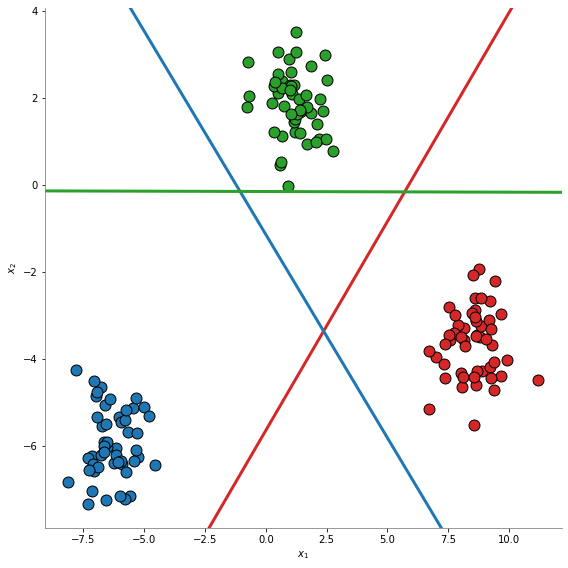

In [4]:
import numpy as np

plt.figure(figsize=(8, 8))
plot_scatter()

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)

fronteraA = (
    -sgdClassifier.intercept_[0] / sgdClassifier.coef_[0][1]
    - sgdClassifier.coef_[0][0] / sgdClassifier.coef_[0][1] * xplot
)

fronteraB = (
    -sgdClassifier.intercept_[1] / sgdClassifier.coef_[1][1]
    - sgdClassifier.coef_[1][0] / sgdClassifier.coef_[1][1] * xplot
)

fronteraC = (
    -sgdClassifier.intercept_[2] / sgdClassifier.coef_[2][1]
    - sgdClassifier.coef_[2][0] / sgdClassifier.coef_[2][1] * xplot
)


plt.plot(xplot, fronteraA, color="tab:red", linewidth=3)
plt.plot(xplot, fronteraB, color="tab:blue", linewidth=3)
plt.plot(xplot, fronteraC, color="tab:green", linewidth=3)

plt.xlim(xlim)
plt.ylim(ylim)

plt.show()